In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [50]:
%%capture
%run exploratory_analysis

In [6]:
from IPython.display import display, Math, Latex
ddG = Latex(r"$\Delta \Delta G$")

In [1]:
from IPython.html.services.config import ConfigManager
ip = get_ipython()
cm = ConfigManager(parent=ip, profile_dir=ip.profile_dir.location)
extensions = cm.get('notebook')
extensions

{'load_extensions': {'publishing/nbconvert_button': True,
  'publishing/printview_button': True,
  'publishing/printviewmenu_button': True,
  'usability/chrome-clipboard/main': True,
  'usability/codefolding/main': True,
  'usability/comment-uncomment': True,
  'usability/dragdrop/main': True,
  'usability/navigation-hotkeys/main': True,
  'usability/python-markdown/main': True,
  'usability/runtools/main': True}}

## Provean predicts disease states better than FoldX

Provean score distribution stays roughly the same for core mutations with different *solvent accessibilities* and for interface mutations with different *minimum contact distance* cutoffs. FoldX $\Delta \Delta G$ scores show much larger differences between disease and polymorphism when the *solvent accessibility* is low for core mutations or when the *minimum contact distance* is low for interface mutations.

Provean {{ddG}} vs. ELASPIC {{ddG}} ...

In [3]:
ddG 

<IPython.core.display.Latex object>

In [4]:
# hello
from IPython.display import display, Math, Latex
x = 10
ddG = Latex(r"$\Delta \Delta G$")

x is {{x}} 

ddG = {{ddG}}

In [5]:
# Provean all
print("Provean score distributions for Uniprot disease / polymorphism core and interface mutations.")

plot_options = {
    'normed': True,
    'bins': 50,
    'range': (-15, 10),
    'bins': 25,
    'alpha': 0.6,
}
fg, ax = plt.subplots(1, 2, figsize=(13.5, 6))

plot_options['ax'] = ax[0]
df_subset(mutation_data['uniprot']['polymorphism_core'], solvent_accessibility_wt=('<', 1000)
    )['provean_score'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_core'], solvent_accessibility_wt=('<', 1000)
    )['provean_score'].hist(**plot_options)
plot_options['ax'].set_xlabel('Provean score')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Core mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

plot_options['ax'] = ax[1]
df_subset(mutation_data['uniprot']['polymorphism_interface'], contact_distance_wt=('<', 40)
    )['provean_score'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_interface'], contact_distance_wt=('<', 40)
    )['provean_score'].hist(**plot_options)
plot_options['ax'].set_xlabel('Provean score')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Interface mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

fg.tight_layout()
#plt.savefig('/home/kimlab1/strokach/documents/presentations/lab-meetings/14-09-16/uniprot_sift.png', dpi=150)

Provean score distributions for Uniprot disease / polymorphism core and interface mutations.


NameError: name 'plt' is not defined

Provean score distributions for Uniprot disease / polymorphism core mutations with solvent_accessibility < 20 and interface mutations with contact_distance < 4 A.


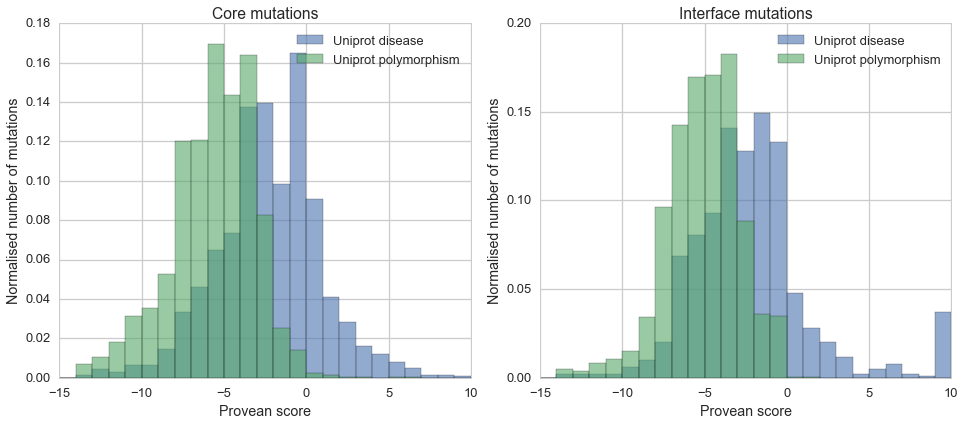

In [52]:
# Provean with thresholds
print("Provean score distributions for Uniprot disease / polymorphism core mutations with "
      "solvent_accessibility < 20 and interface mutations with contact_distance < 4 A.")

plot_options = {
    'normed': True,
    'bins': 50,
    'range': (-15, 10),
    'bins': 25,
    'alpha': 0.6,
}
fg, ax = plt.subplots(1, 2, figsize=(13.5, 6))

plot_options['ax'] = ax[0]
df_subset(mutation_data['uniprot']['polymorphism_core'], solvent_accessibility_wt=('<', 20)
    )['provean_score'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_core'], solvent_accessibility_wt=('<', 20)
    )['provean_score'].hist(**plot_options)
plot_options['ax'].set_xlabel('Provean score')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Core mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

plot_options['ax'] = ax[1]
df_subset(mutation_data['uniprot']['polymorphism_interface'], contact_distance_wt=('<', 4)
    )['provean_score'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_interface'], contact_distance_wt=('<', 4)
    )['provean_score'].hist(**plot_options)
plot_options['ax'].set_xlabel('Provean score')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Interface mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

fg.tight_layout()
#plt.savefig('/home/kimlab1/strokach/documents/presentations/lab-meetings/14-09-16/uniprot_sift.png', dpi=150)

FoldX $\Delta \Delta G$ score distributions all Uniprot disease / polymorphism mutations.


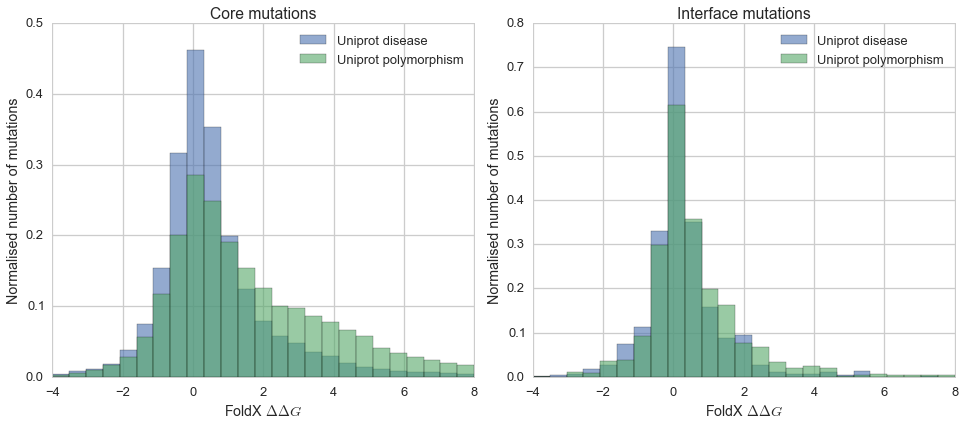

In [53]:
# FoldX all
print("FoldX $\Delta \Delta G$ score distributions all Uniprot disease / polymorphism mutations.")

plot_options = {
    'normed': True,
    'bins': 50,
    'range': (-4, 8),
    'bins': 25,
    'alpha': 0.6,
}

fg, ax = plt.subplots(1, 2, figsize=(13.5, 6))

plot_options['ax'] = ax[0]
df_subset(mutation_data['uniprot']['polymorphism_core'], solvent_accessibility_wt=('<', 1000)
    )['dg_change'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_core'], solvent_accessibility_wt=('<', 1000)
    )['dg_change'].hist(**plot_options)
plot_options['ax'].set_xlabel('FoldX $\Delta \Delta G$')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Core mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

plot_options['ax'] = ax[1]
df_subset(mutation_data['uniprot']['polymorphism_interface'], contact_distance_wt=('<', 40)
    )['dg_change'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_interface'], contact_distance_wt=('<', 40)
    )['dg_change'].hist(**plot_options)
plot_options['ax'].set_xlabel('FoldX $\Delta \Delta G$')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Interface mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

fg.tight_layout()
#plt.savefig('/home/kimlab1/strokach/documents/presentations/lab-meetings/14-09-16/uniprot_sift.png', dpi=150)

Foldx $\Delta \Delta G$ distributions for Uniprot disease / polymorphism core mutations with *solvent_accessibility* < 20 and interface mutations with *contact_distance* < 4 A.


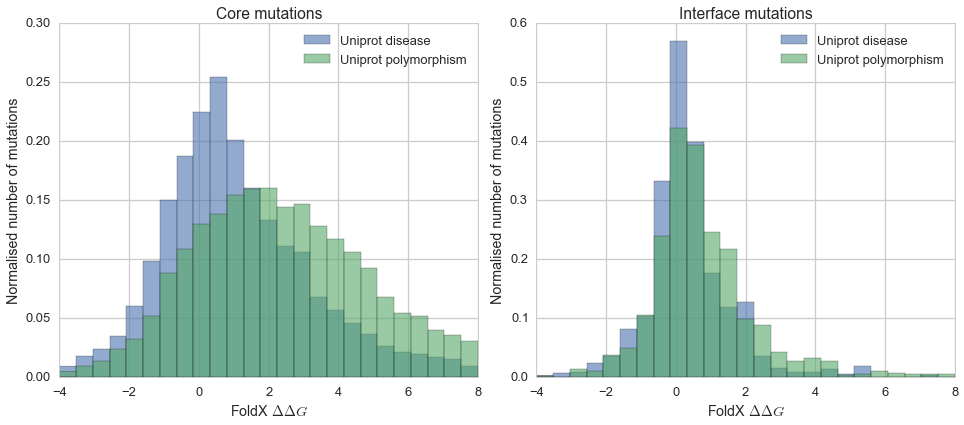

In [48]:
# FoldX with thresholds
print(
    "Foldx $\Delta \Delta G$ distributions for Uniprot disease / polymorphism "
    "core mutations with *solvent_accessibility* < 20 and "
    "interface mutations with *contact_distance* < 4 A.")

plot_options = {
    'normed': True,
    'bins': 50,
    'range': (-4, 8),
    'bins': 25,
    'alpha': 0.6,
}
fg, ax = plt.subplots(1, 2, figsize=(13.5, 6))

plot_options['ax'] = ax[0]
df_subset(mutation_data['uniprot']['polymorphism_core'], solvent_accessibility_wt=('<', 20)
    )['dg_change'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_core'], solvent_accessibility_wt=('<', 20)
    )['dg_change'].hist(**plot_options)
plot_options['ax'].set_xlabel('FoldX $\Delta \Delta G$')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Core mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

plot_options['ax'] = ax[1]
df_subset(mutation_data['uniprot']['polymorphism_interface'], contact_distance_wt=('<', 4)
    )['dg_change'].hist(**plot_options)
df_subset(mutation_data['uniprot']['disease_interface'], contact_distance_wt=('<', 4)
    )['dg_change'].hist(**plot_options)
plot_options['ax'].set_xlabel('FoldX $\Delta \Delta G$')
plot_options['ax'].set_ylabel('Normalised number of mutations')
plot_options['ax'].set_title('Interface mutations')
plot_options['ax'].legend(['Uniprot disease', 'Uniprot polymorphism'], loc='upper right')

fg.tight_layout()
#plt.savefig('/home/kimlab1/strokach/documents/presentations/lab-meetings/14-09-16/uniprot_sift.png', dpi=150)

## Cool stuff Homey-G

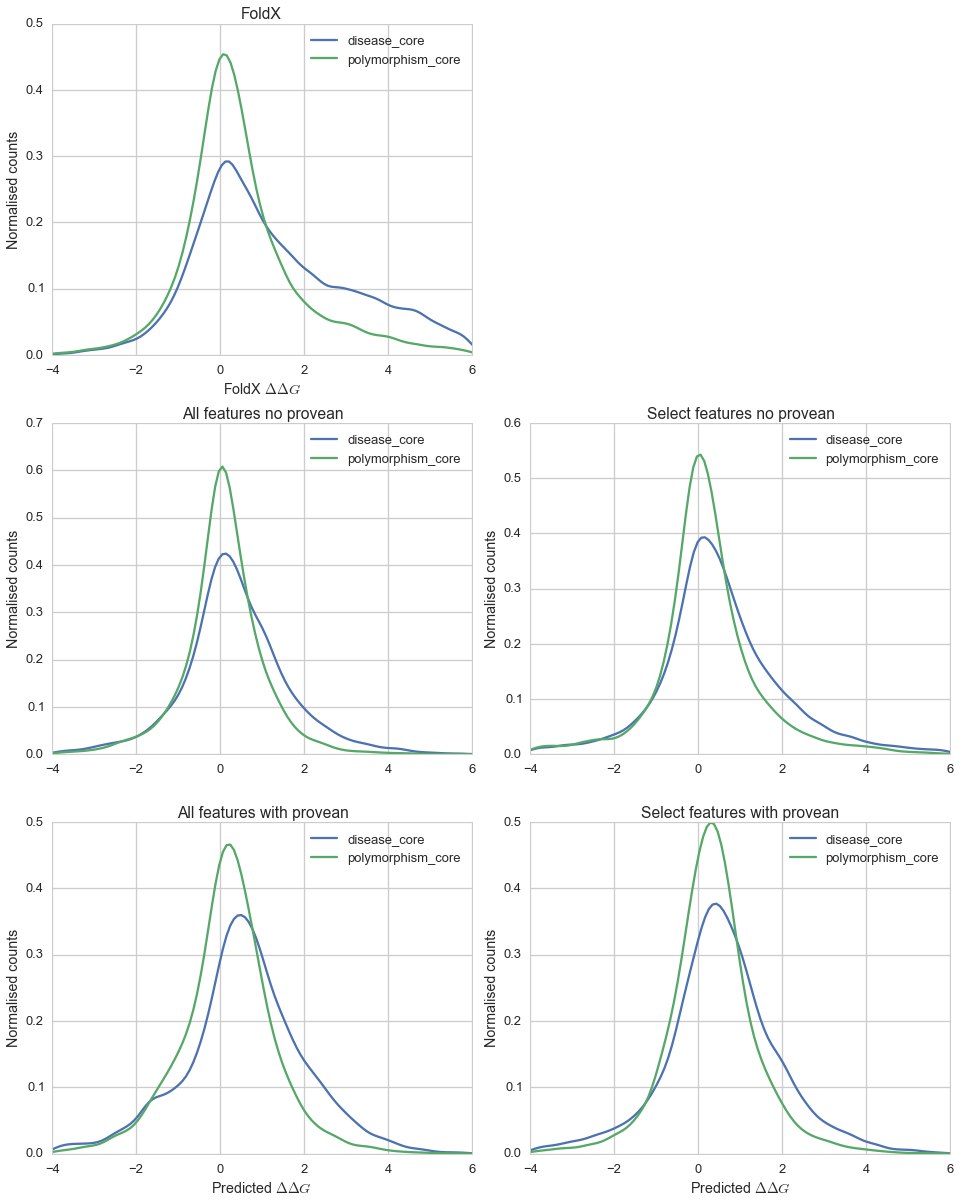

In [43]:
# Make `kde` plots of FoldX and predictor {{ddG}} distributions for Uniprot disease and polymorphism
columns_to_plot = [
    ('dg_change', 'FoldX'),
    (None, None),
    ('ddg_all_p0', 'All features no provean'),
    ('ddg_p0', 'Select features no provean'),
    ('ddg_all_p1', 'All features with provean'),
    ('ddg_p1', 'Select features with provean'),
]

hist_all(mutation_data_wddg, 'uniprot', '_core', columns_to_plot, 'kde')
#plt.savefig(reports_path + 'uniprot_interface_ddg.png', format='png', bbox_inches='tight', dpi=150)